# **Importacion de paquetes**
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# **Carga de los datos**
---

In [3]:
data=pd.read_csv('../../../Dataset_Apart/Raw/DatasetAirbnb_v1.csv')
print('Tamaño: ',data.shape)
data.head()

Tamaño:  (788, 16)


,ID,Titulo,Descripcion Simple,Informacion,Evaluaciones,Tipo,Precio,URL,Limpieza,Veracidad,Llegada,Comunicacion,Ubicacion,Calidad,Servicios,Localizacion
0,1200688382914319681,Magníficas vistas sobre la arena de la playa Wifi,Alojamiento entero: piso en Guardamar de la Sa...,6 viajeros · · 3 dormitorios · · 5 camas · ...,59 evaluaciones,A pie de playa,78 €,https://www.airbnb.es/rooms/31709557?adults=1&...,"Limpieza4,9","Veracidad4,9","Llegada5,0","Comunicación4,8","Ubicación4,9","Calidad4,8","Vistas al marVistas al marAcceso a la playa, p...","Guardamar de la Safor, Comunidad Valenciana, E..."
1,5375220911806434689,Melior-1E,"Alojamiento entero: piso en Calp, España",6 viajeros · · 2 dormitorios · · 3 camas · ...,8 evaluaciones,A pie de playa,83 €,https://www.airbnb.es/rooms/37584336?adults=1&...,"Limpieza4,9","Veracidad4,5","Llegada4,5","Comunicación4,8","Ubicación4,8","Calidad4,8",Vistas a la montañaWifiTVAscensorLavadoraAire ...,"Calp, España"
2,556517738340669403,VERALUX,"Alojamiento entero: piso en Benidorm, España",4 viajeros · · 2 dormitorios · · 3 camas · ...,20 evaluaciones,A pie de playa,70 €,https://www.airbnb.es/rooms/46527977?adults=1&...,"Limpieza3,5","Veracidad4,6","Llegada4,7","Comunicación4,8","Ubicación5,0","Calidad4,3","Acceso a la playa, primera líneaCocinaWifiZona...","Benidorm, Comunidad Valenciana, España1ª línea..."
3,8800182335332003755,Isea Calpe,"Alojamiento entero: piso en Calp, España",4 viajeros · · 2 dormitorios · · 3 camas · ...,557 evaluaciones,A pie de playa,128 €,https://www.airbnb.es/rooms/721277134871448378...,NaN,NaN,NaN,NaN,NaN,NaN,CocinaWifiPiscinaTVAscensorLavadoraAire acondi...,"Calp, Comunidad Valenciana, España"
4,-5036294419472545696,"Apartamento luminoso, internet, Netflix",Alojamiento entero: apto. residencial en Grau ...,6 viajeros · · 2 dormitorios · · 6 camas · ...,64 evaluaciones,A pie de playa,85 €,https://www.airbnb.es/rooms/50155790?adults=1&...,"Limpieza4,9","Veracidad4,9","Llegada4,9","Comunicación4,9","Ubicación4,7","Calidad4,7",Vistas al marVistas al jardínAcceso a la playa...,"Grau i Platja, Comunidad Valenciana, España"


#### **Informacion general**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  788 non-null    int64 
 1   Titulo              788 non-null    object
 2   Descripcion Simple  788 non-null    object
 3   Informacion         788 non-null    object
 4   Evaluaciones        771 non-null    object
 5   Tipo                788 non-null    object
 6   Precio              622 non-null    object
 7   URL                 788 non-null    object
 8   Limpieza            719 non-null    object
 9   Veracidad           719 non-null    object
 10  Llegada             719 non-null    object
 11  Comunicacion        719 non-null    object
 12  Ubicacion           719 non-null    object
 13  Calidad             719 non-null    object
 14  Servicios           784 non-null    object
 15  Localizacion        784 non-null    object
dtypes: int64(1), object(15)
me

#### **Cantidad de datos nulos**

In [5]:
data.isna().sum()

ID                      0
Titulo                  0
Descripcion Simple      0
Informacion             0
Evaluaciones           17
Tipo                    0
Precio                166
URL                     0
Limpieza               69
Veracidad              69
Llegada                69
Comunicacion           69
Ubicacion              69
Calidad                69
Servicios               4
Localizacion            4
dtype: int64

#### **Extracción y conversión de tipos**

In [6]:
import re
patt=r'([0-9]+\xa0viajeros)'
patt_hue=r'([0-9]+\xa0huéspedes)'
patt_camas=r'([0-9]+\scama[s]?)'
patt_ban=r'([0-9]+\sbaño[s]?)'
patt_drom=r'([0-9]+\sdormitorio[s]?)'

#Procesamiento del dataframe
#-----
data['Evaluaciones']=data['Evaluaciones'].str.replace(' evaluaciones','').str.replace('\xa0evaluaciones','').astype(float)
data['Precio']=data['Precio'].str.replace('€','').astype(float)
data['Limpieza']=data['Limpieza'].str.replace('Limpieza','').str.replace(',','.').astype(float)
data['Veracidad']=data['Veracidad'].str.replace('Veracidad','').str.replace(',','.').astype(float)
data['Llegada']=data['Llegada'].str.replace('Llegada','').str.replace(',','.').astype(float)
data['Comunicacion']=data['Comunicacion'].str.replace('Comunicación','').str.replace(',','.').astype(float)
data['Ubicacion']=data['Ubicacion'].str.replace('Ubicación','').str.replace(',','.').astype(float)
data['Calidad']=data['Calidad'].str.replace('Calidad','').str.replace(',','.').astype(float)

data['Capacidad']=data['Informacion'].apply(lambda x:re.findall(patt,x)[0] if len(re.findall(patt,x))>0 else re.findall(patt_hue,x)[0] if len(re.findall(patt_hue,x))>0 else np.nan)
data['Capacidad']=data['Capacidad'].str.replace('\xa0viajeros','').str.replace('\xa0huéspedes','').astype(float)
data['Camas']=data['Informacion'].apply(lambda x: re.findall(patt_camas,x)[0] if len(re.findall(patt_camas,x)) else np.nan)
data['Camas']=data['Camas'].str.replace(' camas','').str.replace(' cama','').astype(float)
data['Baños']=data['Informacion'].apply(lambda x: re.findall(patt_ban,x)[0] if len(re.findall(patt_ban,x)) else np.nan)
data['Baños']=data['Baños'].str.replace(' baños','').str.replace(' baño','').str.replace('\xa0baños','').astype(float)
data['Dormitorios']=data['Informacion'].apply(lambda x: re.findall(patt_drom,x)[0] if len(re.findall(patt_drom,x)) else np.nan)
data['Dormitorios']=data['Dormitorios'].str.replace(' dormitorios','').str.replace(' dormitorio','').astype(float)
data['Baño Compartido']=data['Informacion'].apply(lambda x: 1 if x.find('Baño compartido')!=-1 else 0)

In [7]:
data['Informacion'].values[0]

'6\xa0viajeros ·  · 3 dormitorios ·  · 5 camas ·  · 2 baños'

#### **Extracción de Latitud y Longitud**

In [8]:
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd

def lat_log(l):
    geolocator = Nominatim(user_agent="España")
    try:
        location = geolocator.geocode(l)
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    except:
        return 10000,10000
data['Latitud_Longitud']=data['Localizacion'].apply(lambda x: lat_log(x))
data['Latitud']=data['Latitud_Longitud'].apply(lambda x: x[0])
data['Longitud']=data['Latitud_Longitud'].apply(lambda x: x[1])
data.drop('Latitud_Longitud',axis=1,inplace=True)

In [9]:
def ubi(x):
    """
    Funcion encargada de procesar la informacion de la localización.

    Args:
        x (Fila): Fila del dataframe con la información de la localizacion

    Returns:
        Fila: Informacion procesada de la localización
    """
    try:
        dic={}
        e=x.find('España') if x.find('España')!=-1 else 1e10
        p=x.find('Portugal') if x.find('Portugal')!=-1 else 1e10
        f=x.find('Francia') if x.find('Francia')!=-1 else 1e10

        dic[e]='España'
        dic[p]='Portugal'
        dic[f]='Francia'


        if e==p==f:
            return np.nan
        else:
            minimo=min(e,p,f)

            return x.split(dic[minimo])[0] + dic[minimo]
    except:
        return np.nan

data['Localizacion']=data['Localizacion'].apply(lambda x: str(x).split(',')[-1].replace(' ',''))


#### **Extracción de los servicios**

In [10]:
data['Wifi']=data['Servicios'].str.contains('Wifi').astype(float)
data['Mascotas']=data['Servicios'].str.contains('Admite mascotas').astype(float)
data['Piscina']=data['Servicios'].str.contains('Piscina').astype(float)
data['Parking']=data['Servicios'].str.contains('Aparcamiento gratuito').astype(float)

<Axes: >

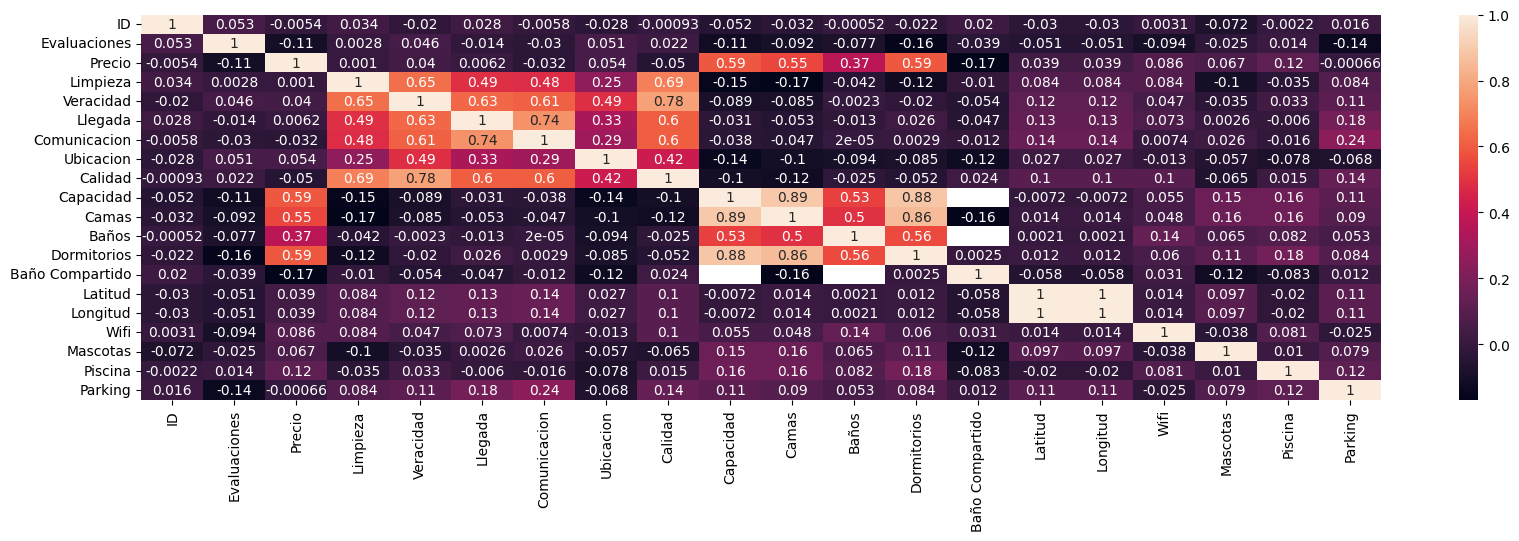

In [21]:
numeric_cols=data.select_dtypes(include='number').columns
plt.figure(figsize=(20,5))
sns.heatmap(data[numeric_cols].corr(),annot=True)

# **Estudio de las evaluaciones**
---

Distribución de las evaluaciones.

<Axes: xlabel='Evaluaciones', ylabel='Count'>

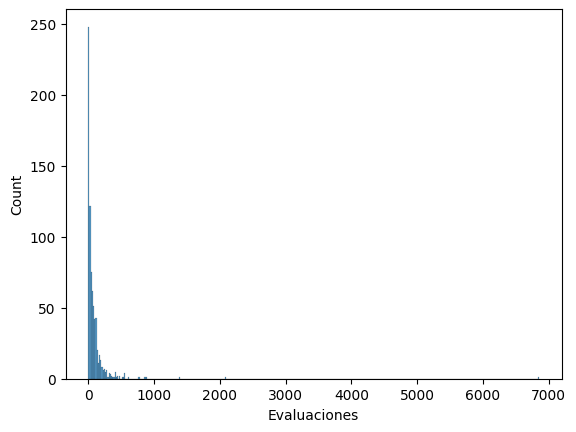

In [22]:
sns.histplot(data['Evaluaciones'])

Distribución sin valores atípicos.

<Axes: xlabel='Evaluaciones', ylabel='Count'>

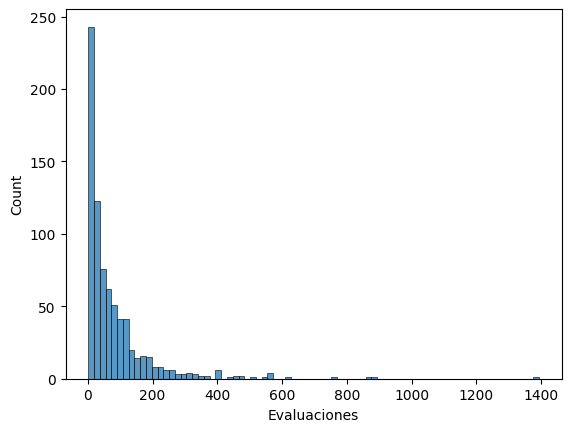

In [35]:
sns.histplot(data.loc[data['Evaluaciones']<2000,'Evaluaciones'])

Distribución sin valores atípicos y con transformación logarítmica.

<Axes: xlabel='Evaluaciones', ylabel='Count'>

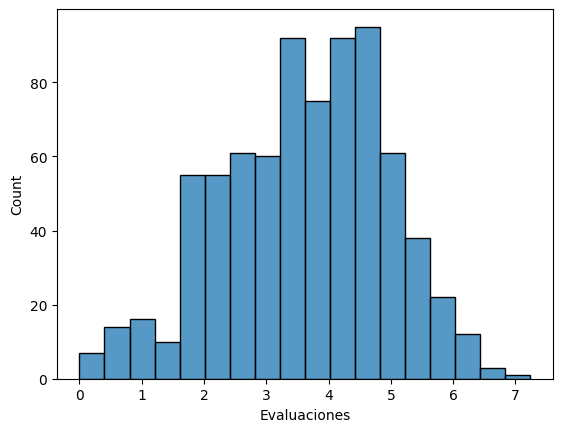

In [24]:
sns.histplot(np.log(data.loc[data['Evaluaciones']<2000,'Evaluaciones']))

Los apartamentos tienen una media de 90 evaluaciones.

In [13]:
data['Evaluaciones'].mean()

90.08430609597924

La media global de valoracion es un 4.8 / 5.

In [14]:
criterios=['Limpieza', 'Veracidad', 'Llegada', 'Comunicacion', 'Ubicacion' , 'Calidad']
data[criterios].mean().mean()

4.794622160407974

#### **Distribución de evaluaciones por pais**

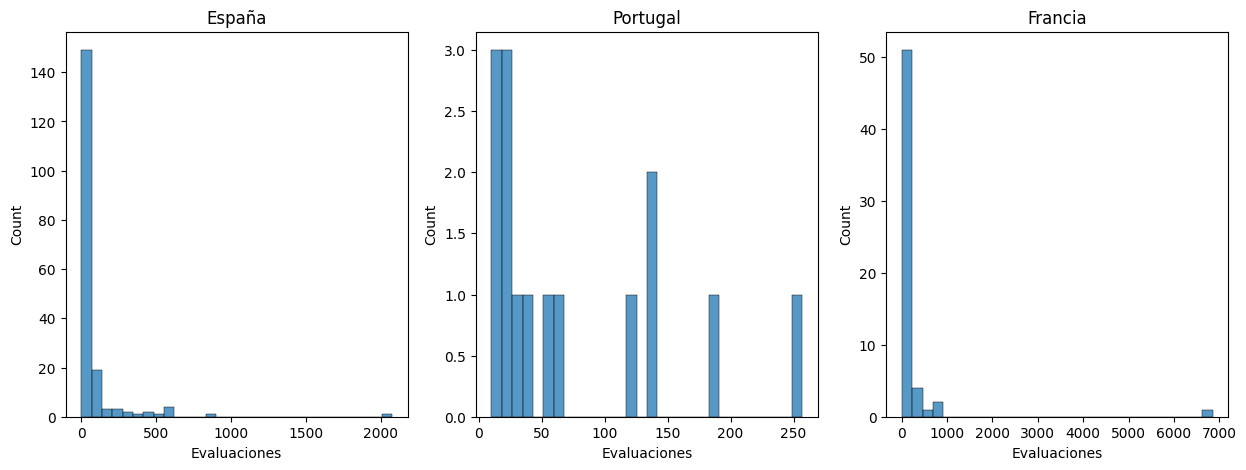

In [11]:
paises=['España', 'Portugal','Francia']
fig,ax=plt.subplots(1,3)
ax[0].set_title('España')
sns.histplot(data[data['Localizacion']=='España']['Evaluaciones'], bins=30,ax=ax[0])
ax[1].set_title('Portugal')
sns.histplot(data[data['Localizacion']=='Portugal']['Evaluaciones'], bins=30,ax=ax[1])
ax[2].set_title('Francia')
sns.histplot(data[data['Localizacion']=='Francia']['Evaluaciones'], bins=30,ax=ax[2])
fig.set_size_inches(15, 5)
plt.show()

#### **Correlación entre variables de evaluación**

<Axes: >

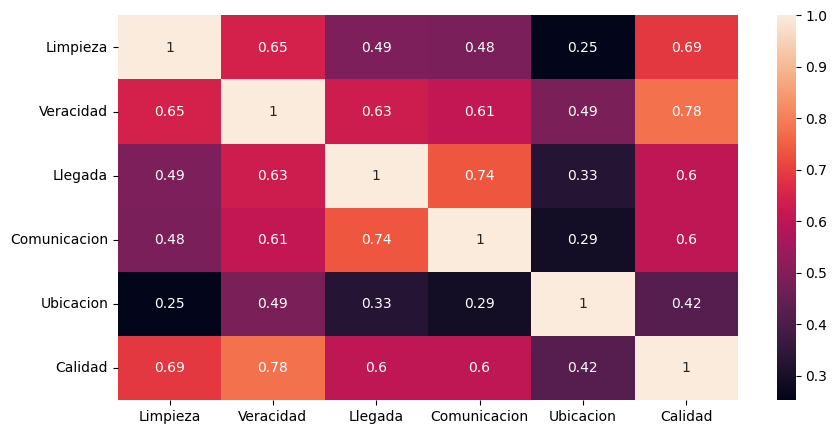

In [20]:
numeric_cols=data.select_dtypes(include='number').columns
plt.figure(figsize=(10,5))
val_cols=['Limpieza','Veracidad','Llegada','Comunicacion','Ubicacion','Calidad']
sns.heatmap(data[val_cols].corr(),annot=True)

# **Estudio de los Servicios**
---


 Servicio:  Wifi


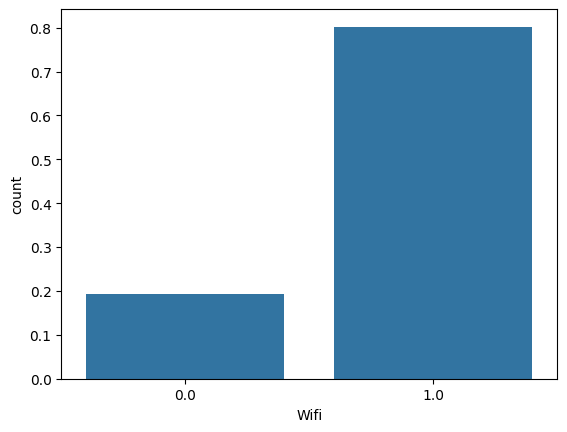


 Servicio:  Mascotas


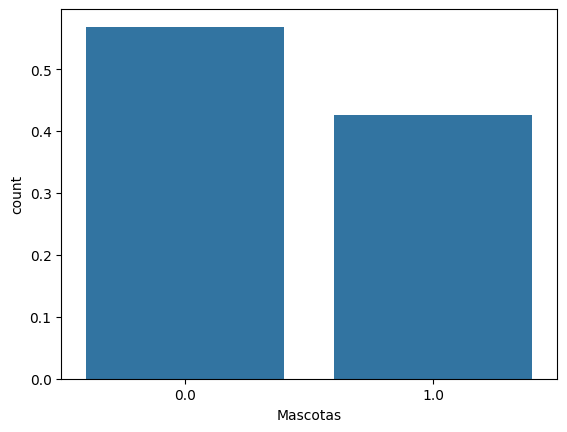


 Servicio:  Piscina


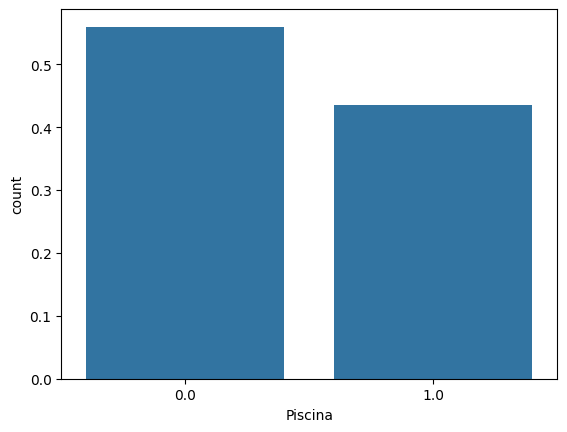


 Servicio:  Parking


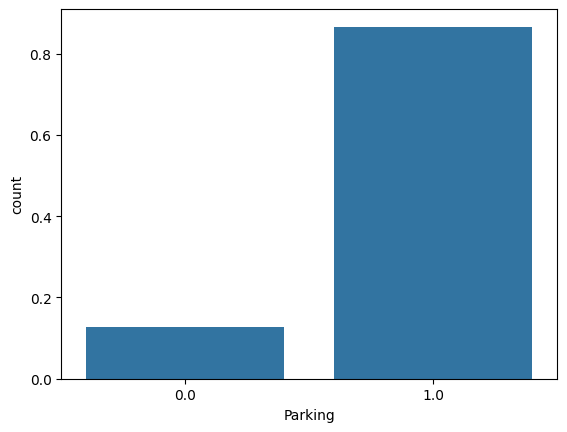

In [13]:
servicios=['Wifi','Mascotas','Piscina','Parking']
for s in servicios:
    print('\n Servicio: ',s)
    sns.barplot(data[s].value_counts() / len(data))
    plt.show()

# **Estudio de la capacidad**
---

#### **Distribución de la capacidad**

<Axes: xlabel='Capacidad', ylabel='Count'>

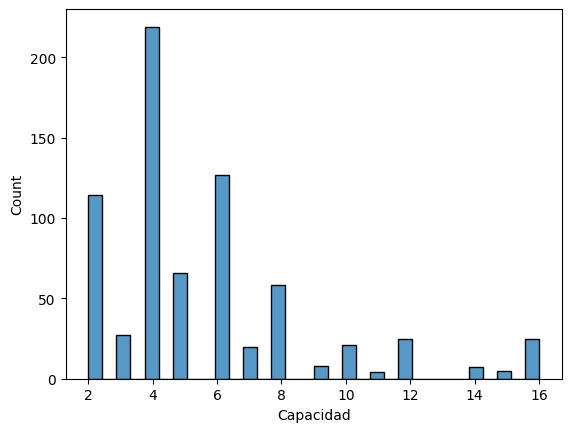

In [18]:
sns.histplot(data['Capacidad'])

La capacidad media de los apartamentos es de 5.6 huéspedes.

In [19]:
data['Capacidad'].mean()

5.619834710743802

<Axes: >

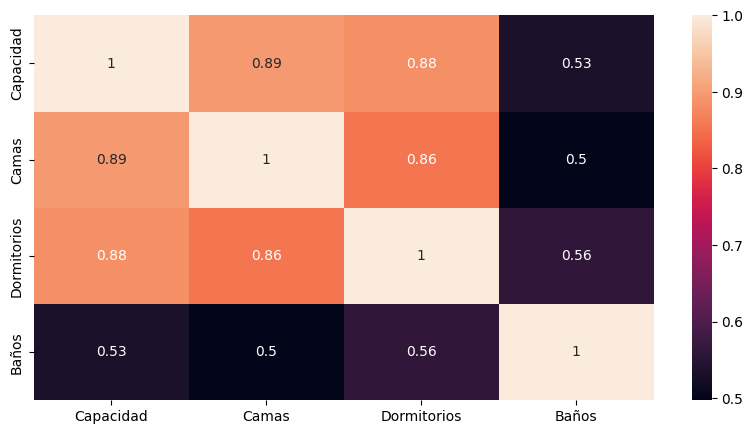

In [20]:
numeric_cols=data.select_dtypes(include='number').columns
plt.figure(figsize=(10,5))
cap_vars=['Capacidad','Camas','Dormitorios','Baños']
sns.heatmap(data[cap_vars].corr(),annot=True)

# **Estudio del precio**
---

El precio medio por noche es de 105€.

In [26]:
data['Precio'].median()

105.0

Distribución del precio.

<Axes: xlabel='Precio', ylabel='Count'>

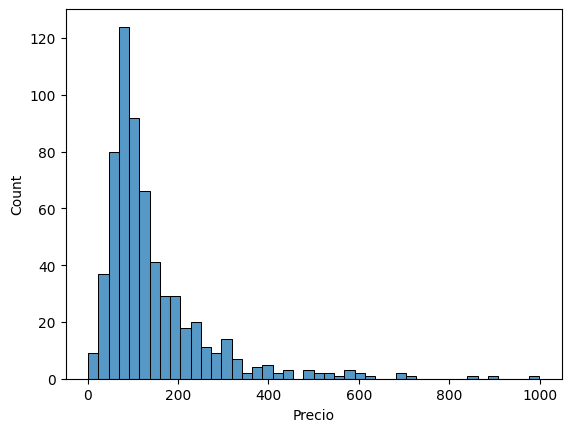

In [27]:
sns.histplot(data['Precio'])

Corrección de la distribución del Precio mediante logaritmo.

<Axes: xlabel='Precio', ylabel='Count'>

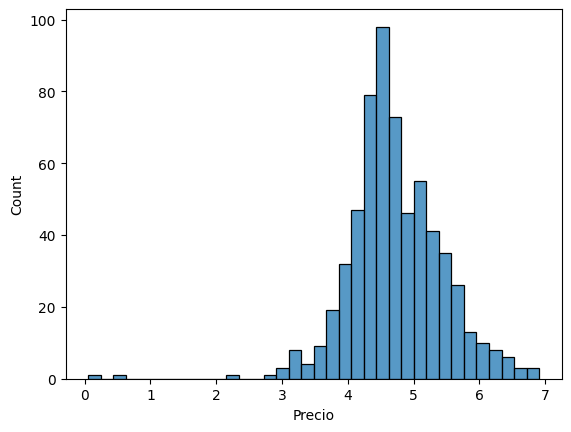

In [28]:
sns.histplot(np.log(data['Precio']))

Relación precio-ubicación.

In [29]:
import pandas as pd
import plotly.express as px

# Datos con latitud/longitud y valores
datos=data[(data['Latitud']!=10000)&(data['Longitud']!=10000)][['Latitud','Longitud','Precio']]
fig = px.density_mapbox(datos, lat = 'Latitud', lon = 'Longitud', z = 'Precio',
                        radius = 7,
                        center = dict(lat = 40.45, lon = -3.6),
                        zoom = 4,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        opacity = 0.5)
fig.show() 


#### **Comparativa del precio medio por tipo.**

<Axes: xlabel='Tipo', ylabel='Precio'>

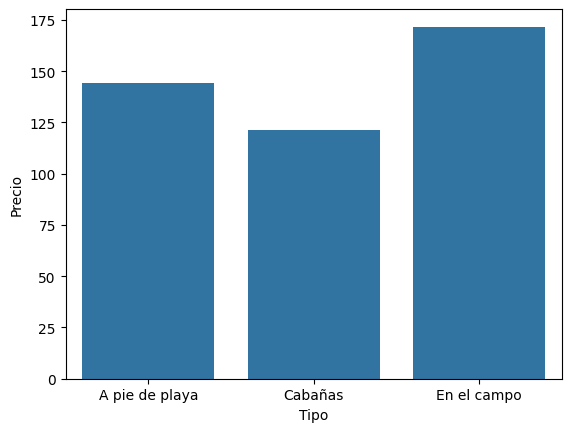

In [30]:
sns.barplot(data=data.groupby('Tipo').agg({
    'Precio':'mean'
}).reset_index(), x='Tipo',y='Precio')


#### **Relacion entre el precio y la Calidad**

<Axes: xlabel='Precio', ylabel='Calidad'>

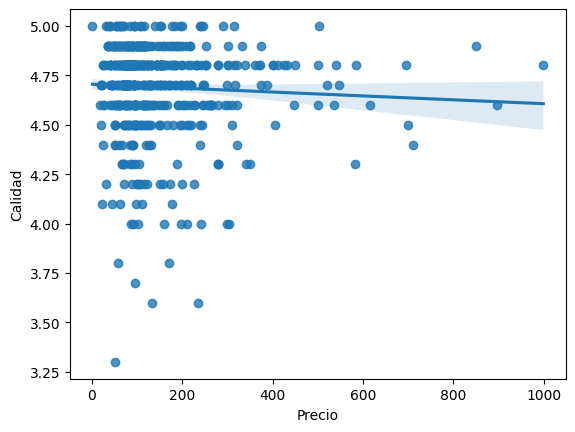

In [31]:
sns.regplot(data=data,x='Precio',y='Calidad')

#### **Relación entre Precio y Capacidad**

<Axes: xlabel='Precio', ylabel='Capacidad'>

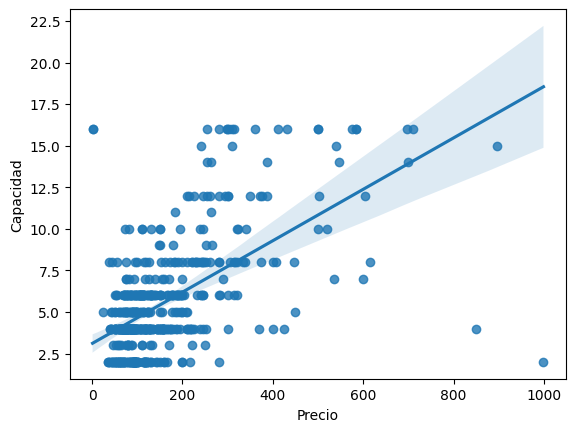

In [32]:
sns.regplot(data=data,x='Precio',y='Capacidad')

#### **Distribución capacidad por tipo de apartamento**

<Axes: xlabel='Tipo', ylabel='Capacidad'>

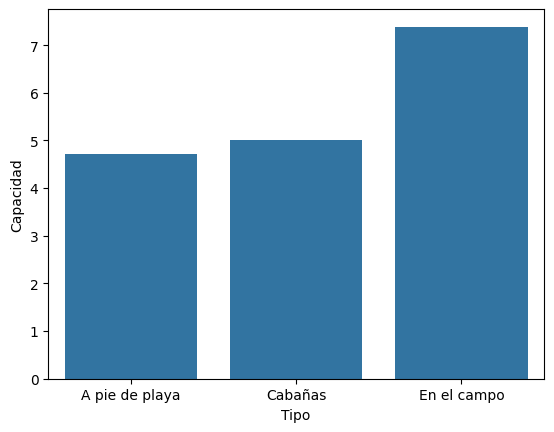

In [33]:
sns.barplot(data=data.groupby('Tipo').agg({
    'Capacidad':'mean'
}).reset_index(), x='Tipo',y='Capacidad')

#### **Precio medio por tipo por persona**

In [35]:
data_est_precio=data.groupby('Tipo').agg({'Precio':'mean','Capacidad':'mean'}).reset_index()
data_est_precio['Precio_por_persona']=data_est_precio['Precio']/data_est_precio['Capacidad']
data_est_precio.head()

,Tipo,Precio,Capacidad,Precio_por_persona
0,A pie de playa,144.330144,4.718876,30.585707
1,Cabañas,121.112109,5.007692,24.185214
2,En el campo,171.693000,7.387097,23.242284


# **Análisis de Títulos y Descripciones**
---

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Descargar recursos de NLTK
nltk.download('stopwords')

stop_words = list(stopwords.words('spanish'))
print(stop_words)
# Cargar el conjunto de datos (asegúrate de ajustar la ruta del archivo CSV)
# Combinar las columnas de texto en una sola columna para el análisis
data['text'] = data['Titulo'] + ' ' + data['Descripcion Simple'] 

# Preprocesamiento de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Eliminar espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['text_clean'] = data['text'].apply(preprocess_text)

# Obtener bigramas y trigramas
all_words = [w for w in ' '.join(data['text_clean']).split() if w not in list(stopwords.words('spanish'))]

all_bigrams = list(nltk.bigrams(all_words))
all_trigrams = list(nltk.trigrams(all_words))

# Contar ocurrencias de bigramas y trigramas
bigram_counts = Counter(all_bigrams)
trigram_counts = Counter(all_trigrams)

# Obtener los 10 bigramas más comunes
common_bigrams = bigram_counts.most_common(10)

# Obtener los 10 trigramas más comunes
common_trigrams = trigram_counts.most_common(10)

# Mostrar los resultados
print("Bigramas más comunes:")
for bigram, count in common_bigrams:
    print(bigram, count)

print("\nTrigramas más comunes:")
for trigram, count in common_trigrams:
    print(trigram, count)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariolamas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[('alojamiento', 674), ('entero', 660), ('españa', 543), ('casa', 258), ('francia', 210), ('chalet', 201), ('piso', 188), ('vivienda', 148), ('cabaña', 119), ('playa', 115)]


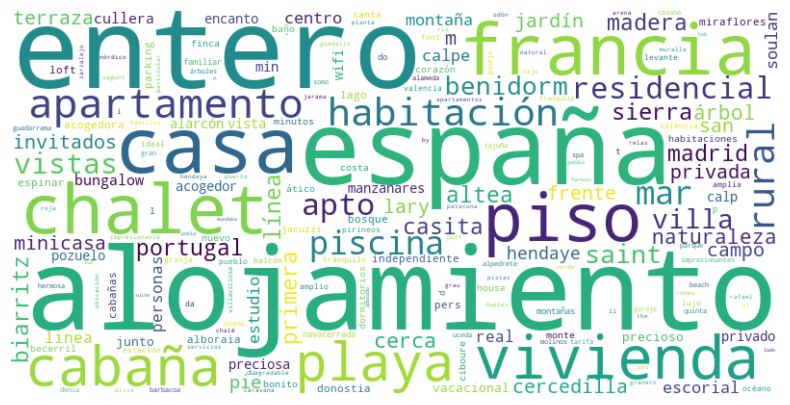

In [16]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
word_counts=Counter(all_words)
common_words = word_counts.most_common(10)
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(word_counts))

print(common_words)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

            Word  Media_evals
392   spaniahome  2076.000000
391     estrella  2076.000000
79       estudio   920.625000
378    nadaillac   888.000000
363         play   867.000000
362        pocos   867.000000
338       concha   768.000000
187        bahía   713.000000
225        alfàs   711.333333
1432     bajanda   613.000000
95          cala   546.000000
71      biarritz   543.838710
226           pi   536.000000
595        claro   515.000000
596         luna   515.000000
598    exclusivo   515.000000
298         nido   498.000000
416          sea   477.000000
442       aparte   477.000000
734       miguel   449.000000


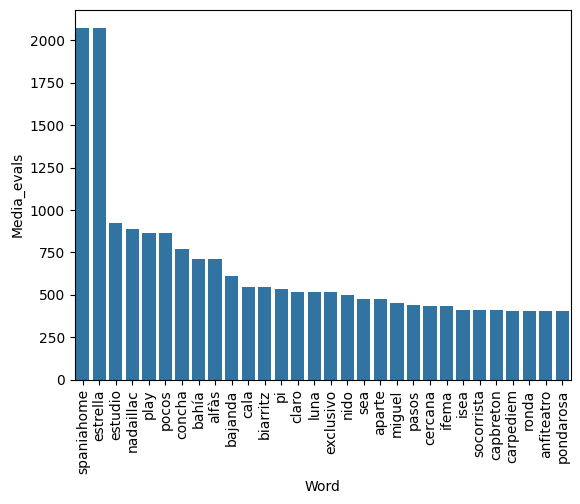

In [17]:
from collections import defaultdict
# Crear un diccionario para almacenar precios asociados a palabras
word_price_dict = defaultdict(list)
data['tokens'] = data['text_clean'].apply(nltk.word_tokenize)
# Llenar el diccionario con precios asociados a cada palabra
for index, row in data.iterrows():
    for word in row['tokens']:
        word_price_dict[word].append(row['Evaluaciones'])

# Calcular el precio medio por palabra
word_avg_price = {word: sum(prices)/len(prices) for word, prices in word_price_dict.items()}

# Convertir el diccionario a un DataFrame para un análisis más fácil
word_avg_price_df = pd.DataFrame(list(word_avg_price.items()), columns=['Word', 'Media_evals'])

# Ordenar las palabras por el precio medio
word_avg_price_df = word_avg_price_df.sort_values(by='Media_evals', ascending=False)

# Mostrar las palabras con el precio medio más alto
sns.barplot(data=word_avg_price_df.iloc[:30],x='Word',y='Media_evals')
plt.xticks(rotation=90)
print(word_avg_price_df.head(20))

# **Selección de variables**
---

<Axes: >

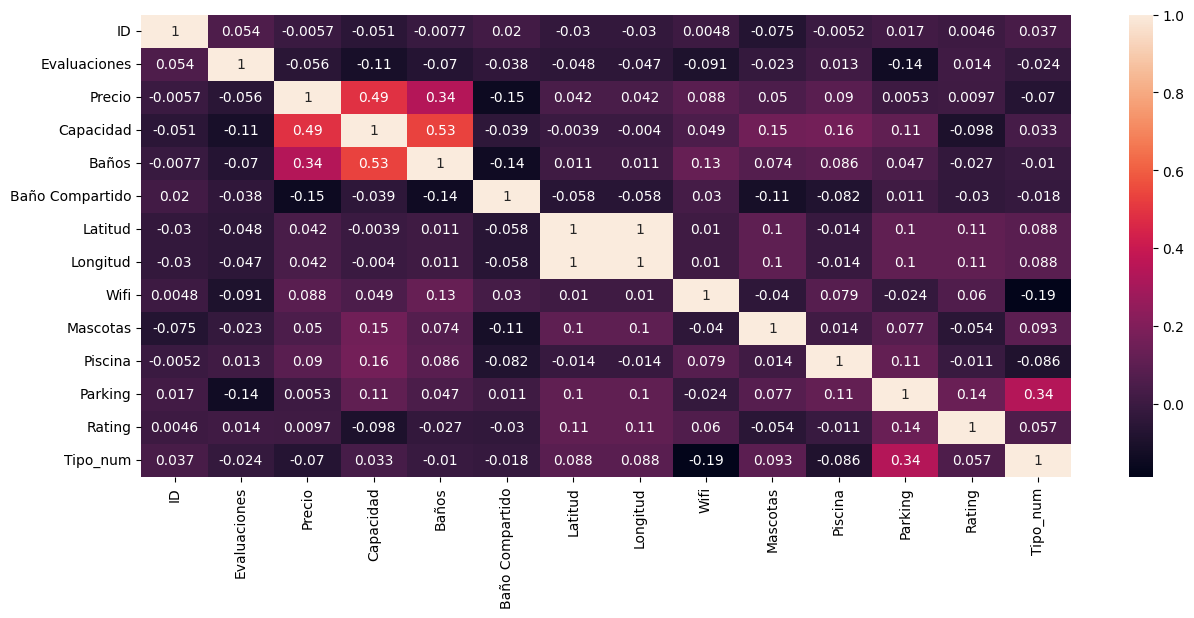

In [66]:
num_cols=data.select_dtypes(include='number').columns
plt.figure(figsize=(15, 6))
sns.heatmap(data[num_cols].corr(),annot=True)


### **VIF**

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfvif = data[num_cols]
num_imputer=SimpleImputer(strategy='median')
dfvif[num_cols]=num_imputer.fit_transform(dfvif[num_cols])
dfvif.shape[1] #hacemos la comprobación

def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

dfvif_estan = dfvif.apply(estandariza, axis=0)
dfvif_estan.head()

vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(dfvif.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan.sort_values(by='VIF',ascending=False)

/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_63668/3847404601.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
14,Latitud,7.298750e+06
15,Longitud,7.298669e+06
9,Capacidad,5.760348e+00
12,Dormitorios,4.905293e+00
10,Camas,4.481280e+00
4,Veracidad,3.368059e+00
8,Calidad,3.252883e+00
5,Llegada,2.573914e+00
6,Comunicacion,2.546986e+00
3,Limpieza,2.156462e+00


### **Varianza**

In [42]:
data[num_cols].var()

ID                 2.952563e+37
Evaluaciones       7.793946e+04
Precio             1.491994e+04
Limpieza           7.955730e-02
Veracidad          4.596619e-02
Llegada            3.804712e-02
Comunicacion       4.192468e-02
Ubicacion          2.954386e-02
Calidad            5.940051e-02
Capacidad          1.092010e+01
Camas              8.025727e+00
Baños              2.312958e+00
Dormitorios        2.130853e+00
Baño Compartido    4.365353e-02
Latitud            2.244638e+07
Longitud           2.264154e+07
Wifi               1.564886e-01
Mascotas           2.452107e-01
Piscina            2.464080e-01
Parking            1.123736e-01
dtype: float64

Con esto decidimos no emplear estas variables para segmentación:
- Calculamos una media sobre las evaluaciones en ubicacion, limpieza, veracidad, comunicacion y calidad.
- Eliminamos las variables camas y dormitorios por su elevada correlacion con la variable capacidad.

In [48]:
data['Rating']=data[['Limpieza','Veracidad','Llegada','Comunicacion','Ubicacion','Calidad']].mean(axis=1)
cols_eliminar=['Limpieza','Veracidad','Llegada','Comunicacion','Ubicacion','Calidad','Camas','Dormitorios']
data.drop(cols_eliminar,axis=1,inplace=True)

# **Rellenamos nulos**
---

In [49]:
num_imputer=SimpleImputer(strategy='median')
num_cols=data.select_dtypes(include='number').columns
data[num_cols]=num_imputer.fit_transform(data[num_cols])

In [50]:
cat_cols=data.select_dtypes(exclude='number').columns
data[cat_cols].head()

,Titulo,Descripcion Simple,Informacion,Tipo,URL,Servicios,Localizacion,text,text_clean
0,Magníficas vistas sobre la arena de la playa Wifi,Alojamiento entero: piso en Guardamar de la Sa...,6 viajeros · · 3 dormitorios · · 5 camas · ...,A pie de playa,https://www.airbnb.es/rooms/31709557?adults=1&...,"Vistas al marVistas al marAcceso a la playa, p...",fueurbanizadahacemenosde20añosyestábiencomunic...,Magníficas vistas sobre la arena de la playa W...,magníficas vistas sobre la arena de la playa w...
1,Melior-1E,"Alojamiento entero: piso en Calp, España",6 viajeros · · 2 dormitorios · · 3 camas · ...,A pie de playa,https://www.airbnb.es/rooms/37584336?adults=1&...,Vistas a la montañaWifiTVAscensorLavadoraAire ...,España,"Melior-1E Alojamiento entero: piso en Calp, Es...",melior e alojamiento entero piso en calp españa
2,VERALUX,"Alojamiento entero: piso en Benidorm, España",4 viajeros · · 2 dormitorios · · 3 camas · ...,A pie de playa,https://www.airbnb.es/rooms/46527977?adults=1&...,"Acceso a la playa, primera líneaCocinaWifiZona...",estancosytiendasenlazona.Mostrarmás,"VERALUX Alojamiento entero: piso en Benidorm, ...",veralux alojamiento entero piso en benidorm es...
3,Isea Calpe,"Alojamiento entero: piso en Calp, España",4 viajeros · · 2 dormitorios · · 3 camas · ...,A pie de playa,https://www.airbnb.es/rooms/721277134871448378...,CocinaWifiPiscinaTVAscensorLavadoraAire acondi...,España,"Isea Calpe Alojamiento entero: piso en Calp, E...",isea calpe alojamiento entero piso en calp españa
4,"Apartamento luminoso, internet, Netflix",Alojamiento entero: apto. residencial en Grau ...,6 viajeros · · 2 dormitorios · · 6 camas · ...,A pie de playa,https://www.airbnb.es/rooms/50155790?adults=1&...,Vistas al marVistas al jardínAcceso a la playa...,España,"Apartamento luminoso, internet, Netflix Alojam...",apartamento luminoso internet netflix alojamie...


In [52]:
map_tipos={'A pie de playa':0,'En el campo':1,'Cabañas':2}
data['Tipo_num']=data['Tipo'].map(map_tipos)

# **Clustering apartamentos**
---

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

cols_num=data.select_dtypes(include='number').columns

Para k = 2 , el coste (SSE)= 5.501290030537907e+39
Para k = 3 , el coste (SSE)= 2.3937781981049704e+39
Para k = 4 , el coste (SSE)= 1.45079004536465e+39
Para k = 5 , el coste (SSE)= 8.948882366272995e+38
Para k = 6 , el coste (SSE)= 6.245461693939749e+38
Para k = 7 , el coste (SSE)= 4.2638681000216936e+38
Para k = 8 , el coste (SSE)= 3.3006397453477426e+38
Para k = 9 , el coste (SSE)= 2.8399990700204843e+38
Para k = 10 , el coste (SSE)= 2.3507704503126687e+38


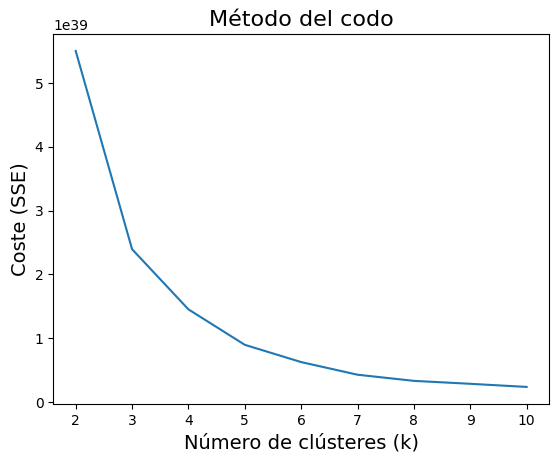

In [57]:
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data[cols_num])
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)
fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

Para k = 2 , CH = 2533.9524411829043
Para k = 3 , CH = 3417.5406739232826
Para k = 4 , CH = 3924.3281247550635
Para k = 5 , CH = 4887.0945712609355
Para k = 6 , CH = 5662.569192000502
Para k = 7 , CH = 6963.485348920216
Para k = 8 , CH = 7733.198381970782
Para k = 9 , CH = 7869.777515855691
Para k = 10 , CH = 8458.332353170359


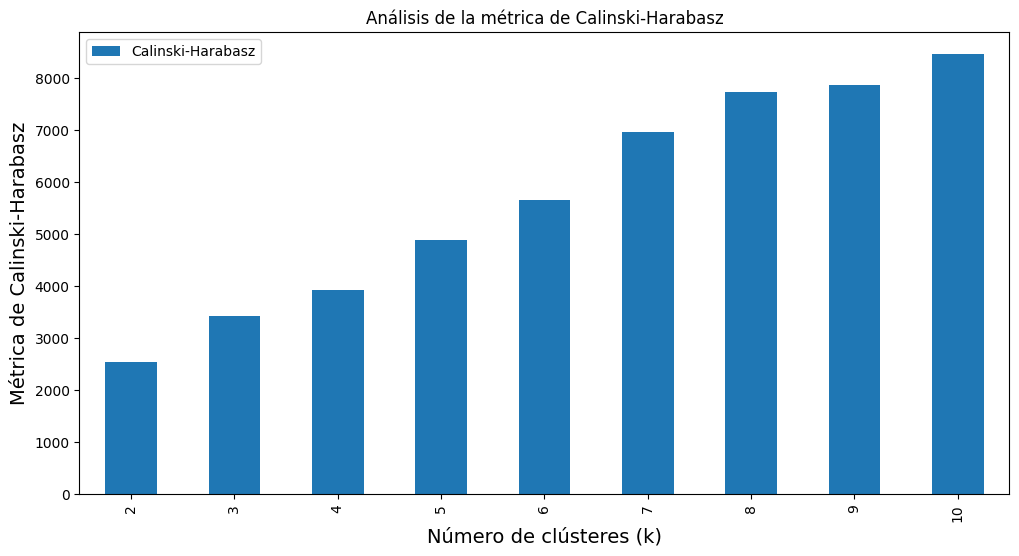

In [58]:
# definimos la n-tupla donde ordenaderemos las sucesivas métricas de Calinski-Harabasz.
# hallados para cada valor de k
Calinski = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para la medida del error de reconstrucción desde k= 2 hasta k= 10 que se
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100)
    Y_pred = kmeans.fit_predict(data[cols_num])
    print(
        "Para k =",
        num,
        ', CH =',
        calinski_harabasz_score(data[cols_num], Y_pred),
    )
    Calinski.append(calinski_harabasz_score(data[cols_num], Y_pred))

fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharey=False)
pd.DataFrame({'n_clusters': krange,'Calinski-Harabasz': Calinski,}).set_index('n_clusters').plot(title='Análisis de la métrica de Calinski-Harabasz',
kind='bar',ax=ax)
ax.set_ylabel("Métrica de Calinski-Harabasz",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
plt.show()

In [60]:
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data[cols_num])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data[cols_num], cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

plt.show()

Para k = 2 , S = 0.6382515214527639
Para k = 3 , S = 0.6033666506140035
Para k = 4 , S = 0.5638473225875483
Para k = 5 , S = 0.5638509433930559
Para k = 6 , S = 0.5613871544189435
Para k = 7 , S = 0.5710473764950474
Para k = 8 , S = 0.5689048670751289


/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_63668/1014862865.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4f/gbmqzwn51yg8gh7yyxzgpcl80000gn/T/ipykernel_63668/1014862865.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



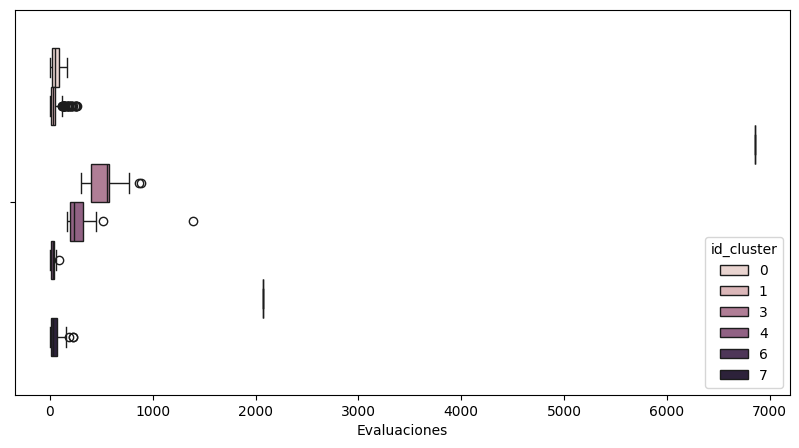

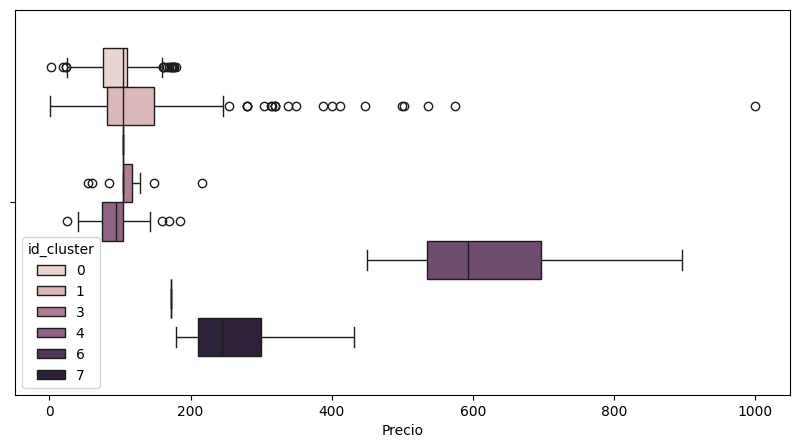

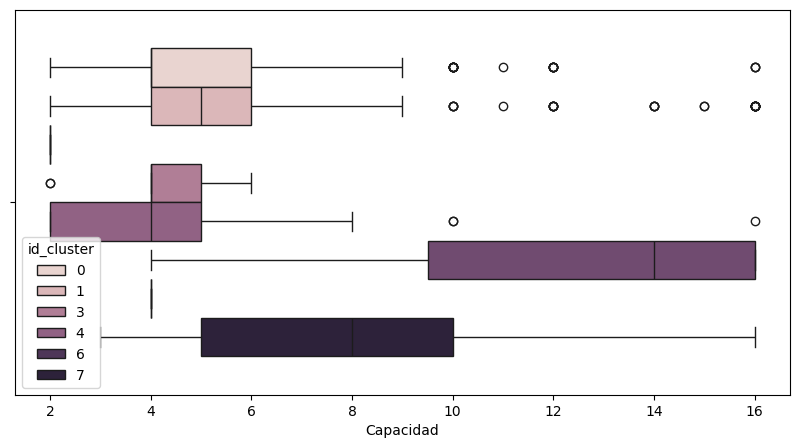

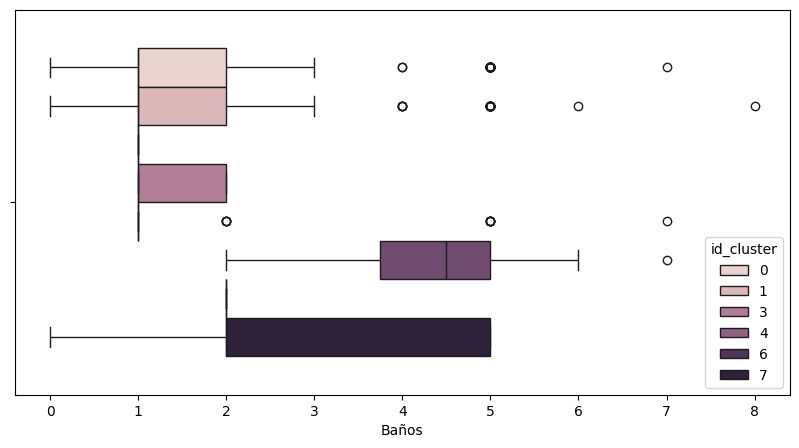

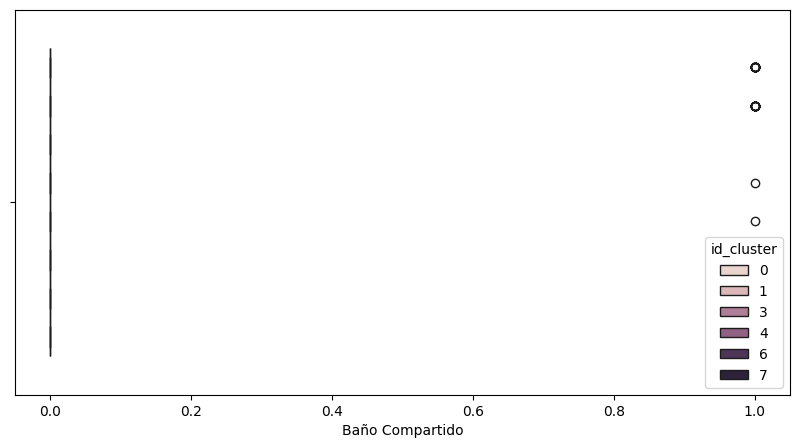

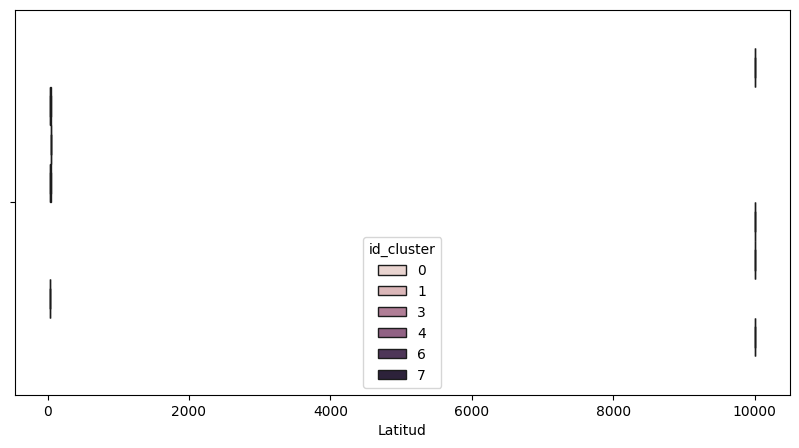

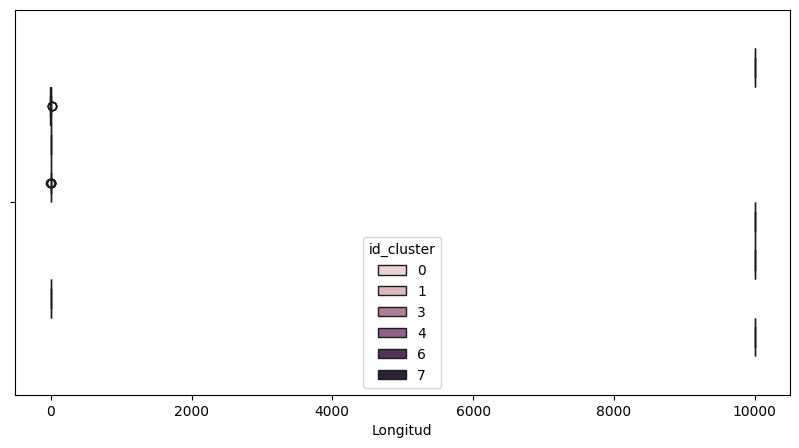

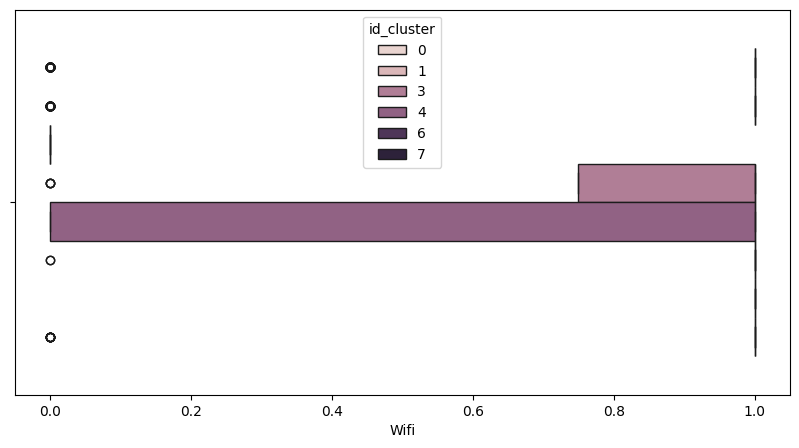

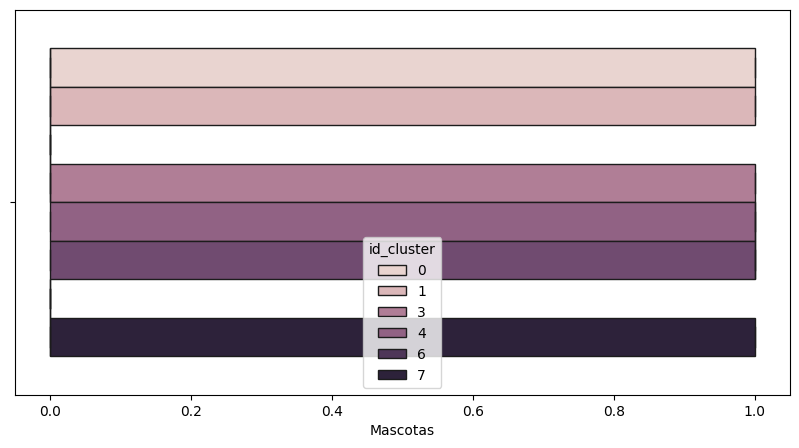

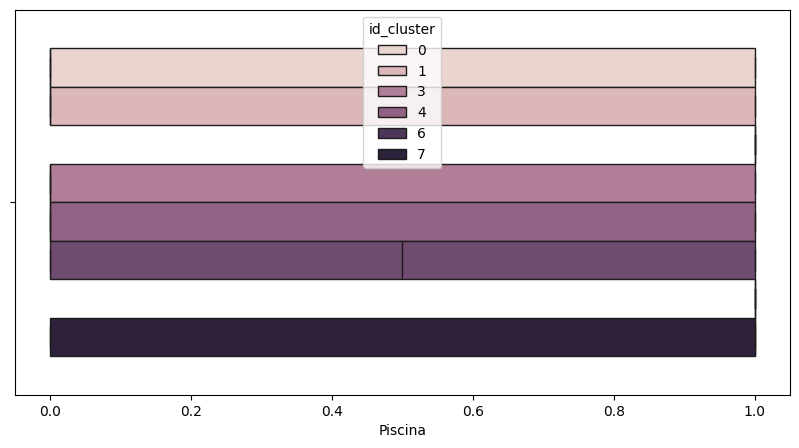

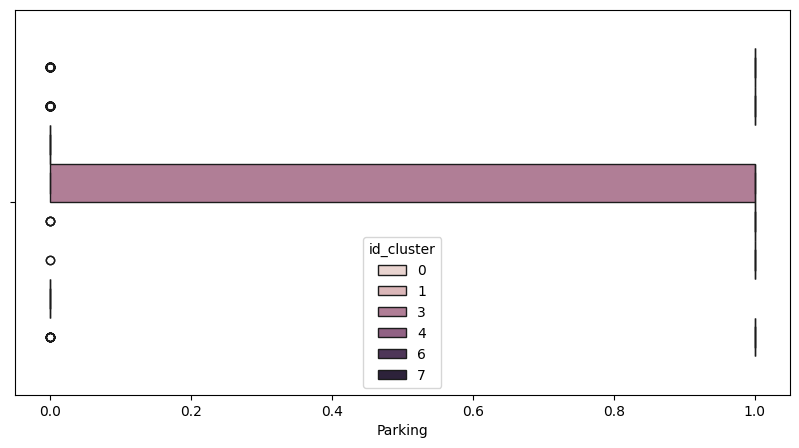

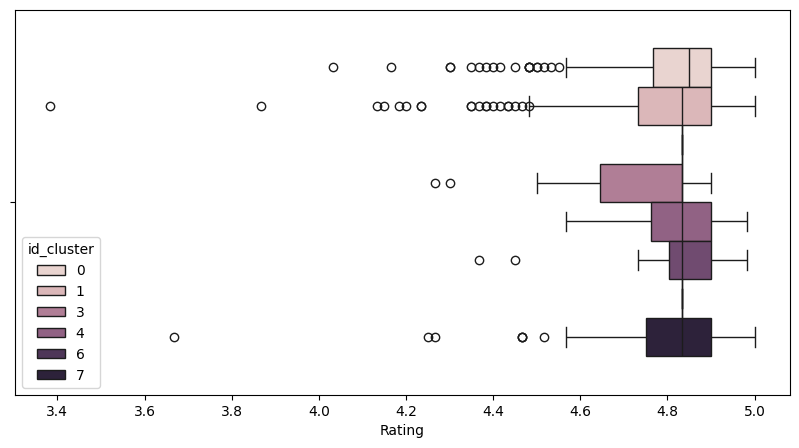

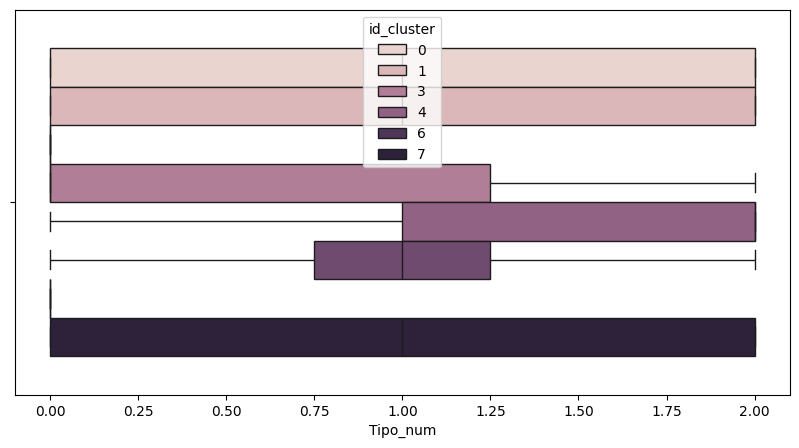

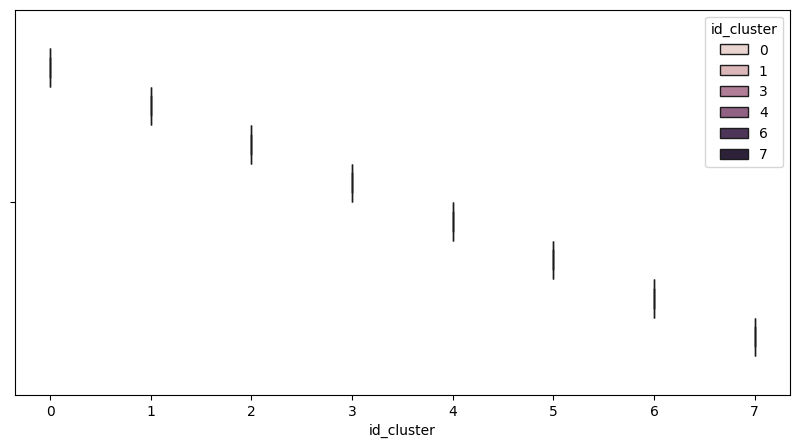

In [65]:
k_val=8
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
data_cluster=data[cols_num]
data_cluster.drop('ID',axis=1,inplace=True)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(data_cluster,x=col,hue='id_cluster',ax=ax)
    plt.show()

In [64]:
data_cluster['id_cluster'].value_counts()

id_cluster
0    516
1    271
2      1
Name: count, dtype: int64

# **DBSCAN CLUSTERING**
--- 

In [79]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.3, min_samples=10).fit(data[cols_num])
labels = db.labels_

# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Número de clusters estimados: {n_clusters_}')
print(f'Número de puntos de ruido: {n_noise_}')

Número de clusters estimados: 0
Número de puntos de ruido: 788
